In [2]:
# Real or not - https://www.kaggle.com/c/nlp-getting-started/data

In [10]:
import pandas as pd
import numpy as np
import re

In [11]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
df_train = df_train.drop(['id', 'keyword', 'location'], axis=1)
df_test = df_test.drop(['id', 'keyword', 'location'], axis=1)

In [13]:
df_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


# Clean the train_df and test_df

In [27]:
df_train['text'] = df_train['text'].apply(lambda x : re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL", x))
df_test['text'] = df_test['text'].apply(lambda x : re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "URL", x))

In [28]:
df_train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. URL,1
7611,Police investigating after an e-bike collided ...,1


# Create a spacy textcat classifier

In [16]:
import spacy

In [17]:
nlp = spacy.blank("en")

In [18]:
# Create a text categorizer pipe and add it to the nlp pipeline
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe("textcat")
    nlp.add_pipe(textcat) 

In [19]:
nlp.pipe_names

['textcat']

In [20]:
# Add labels 
textcat.add_label("POSITIVE")
# textcat.add_label("NEGATIVE")
textcat.labels

('POSITIVE',)

In [21]:

other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'textcat']
other_pipes

[]

Convert the data to POSITIVE and NEGATIVE

In [22]:
# df_train.target = df_train.target.replace({1 : "POSITIVE", 0: "NEGATIVE"})
# df_train

In [23]:
train_texts = df_train.text.to_list()
train_cats = df_train.target.to_list()
train_cats = [{'POSITIVE': bool(y)} for y in train_cats]
train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))
# train_data = list(zip(train_texts, [{"cats": cats} for cats in train_cats]))
# train_data

In [24]:
import random
import matplotlib.pyplot as plt
from datetime import datetime

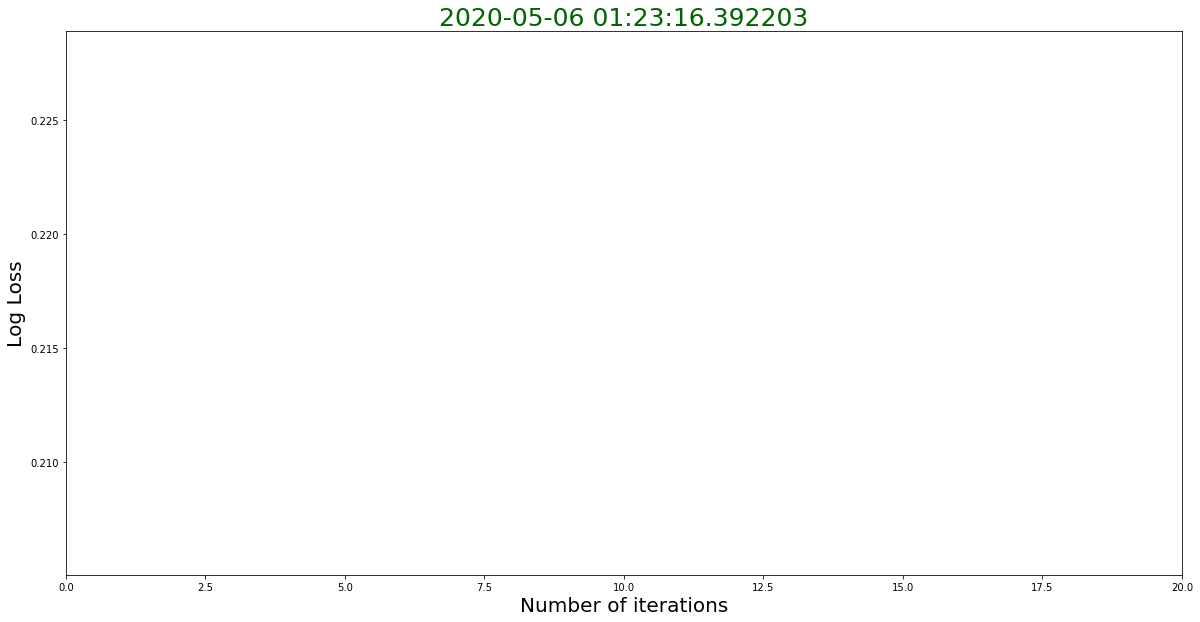

{'textcat': 0.21698042345815338}


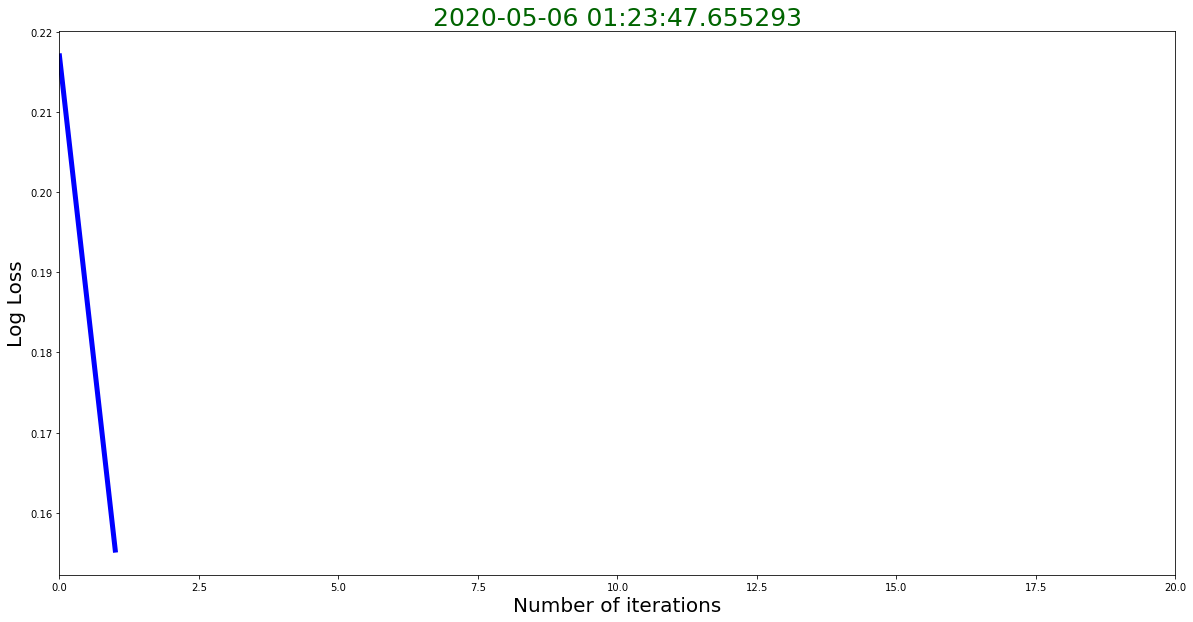

{'textcat': 0.15533112635603175}


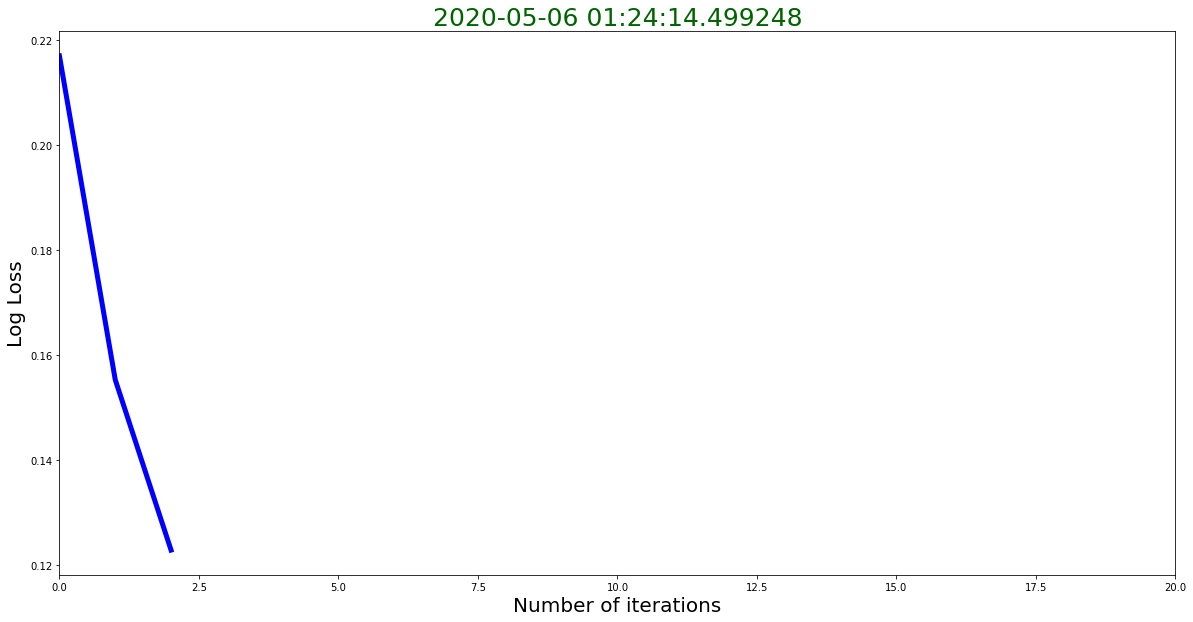

{'textcat': 0.12290792373460135}


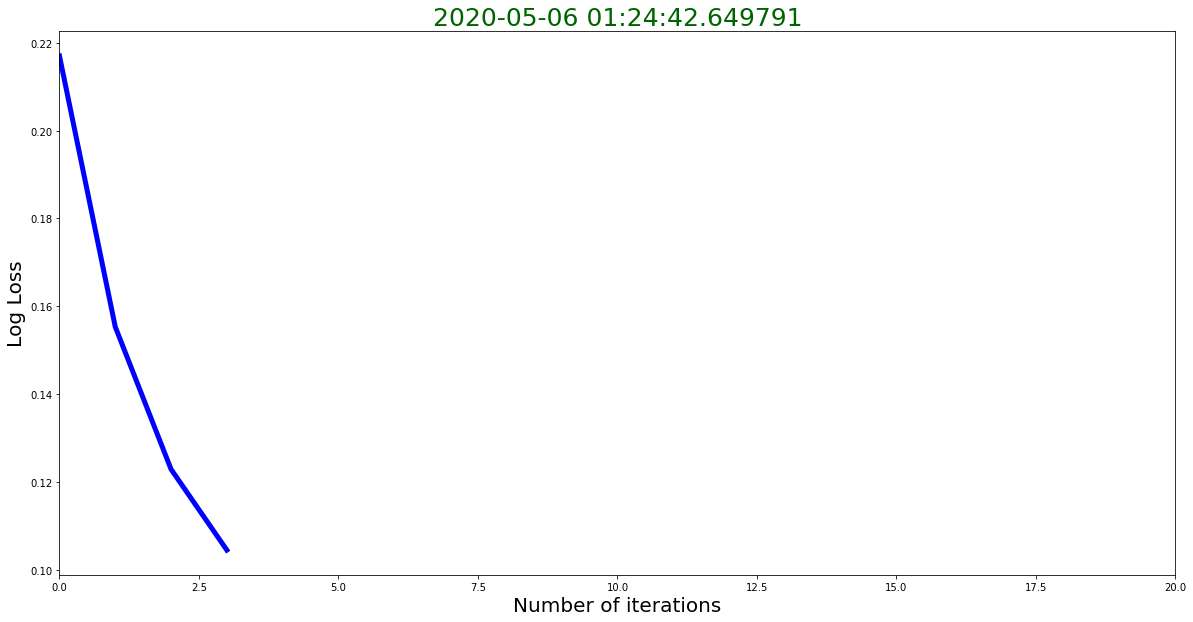

{'textcat': 0.10450723161739006}


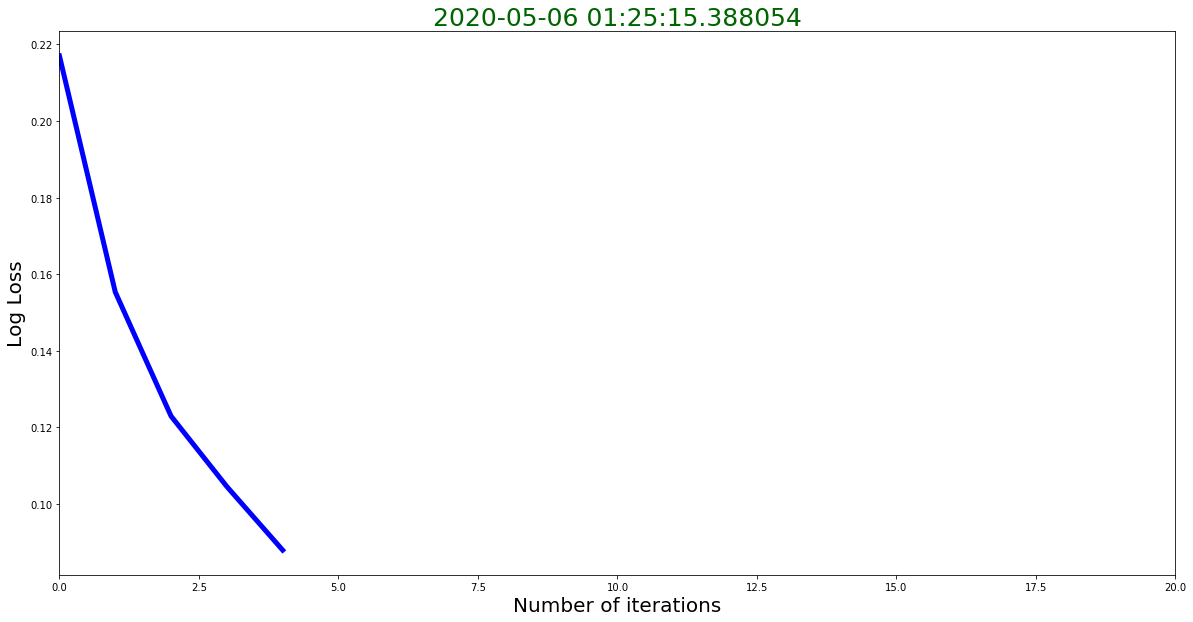

{'textcat': 0.0879183381148323}


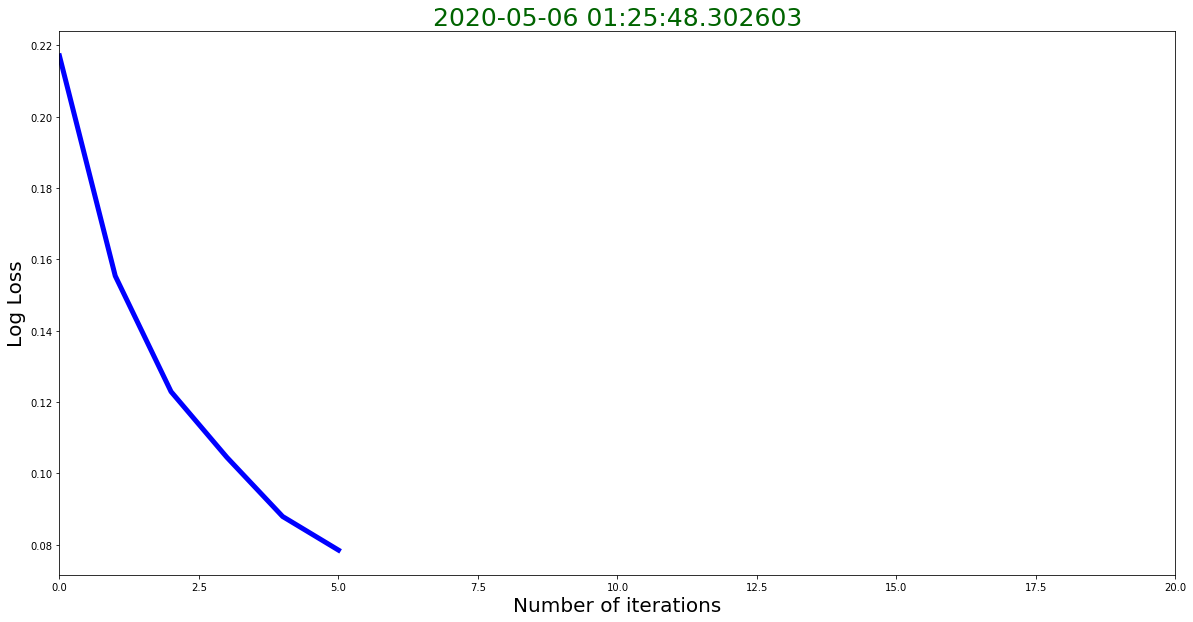

{'textcat': 0.07850567507921369}


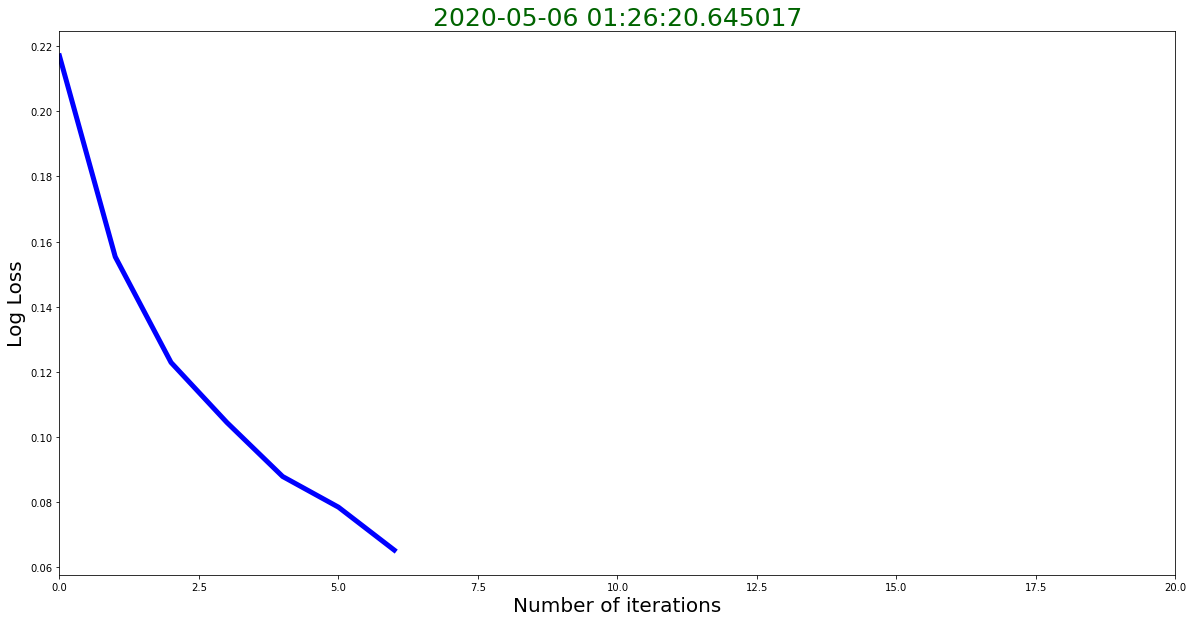

{'textcat': 0.0653326552337603}


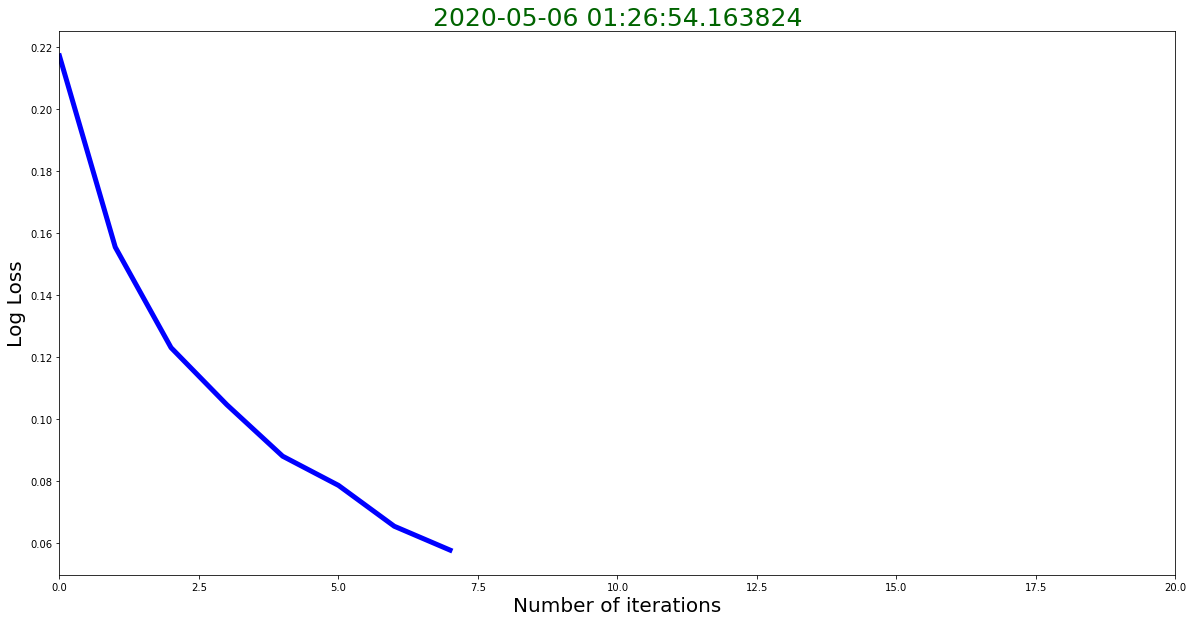

{'textcat': 0.05763862257481378}


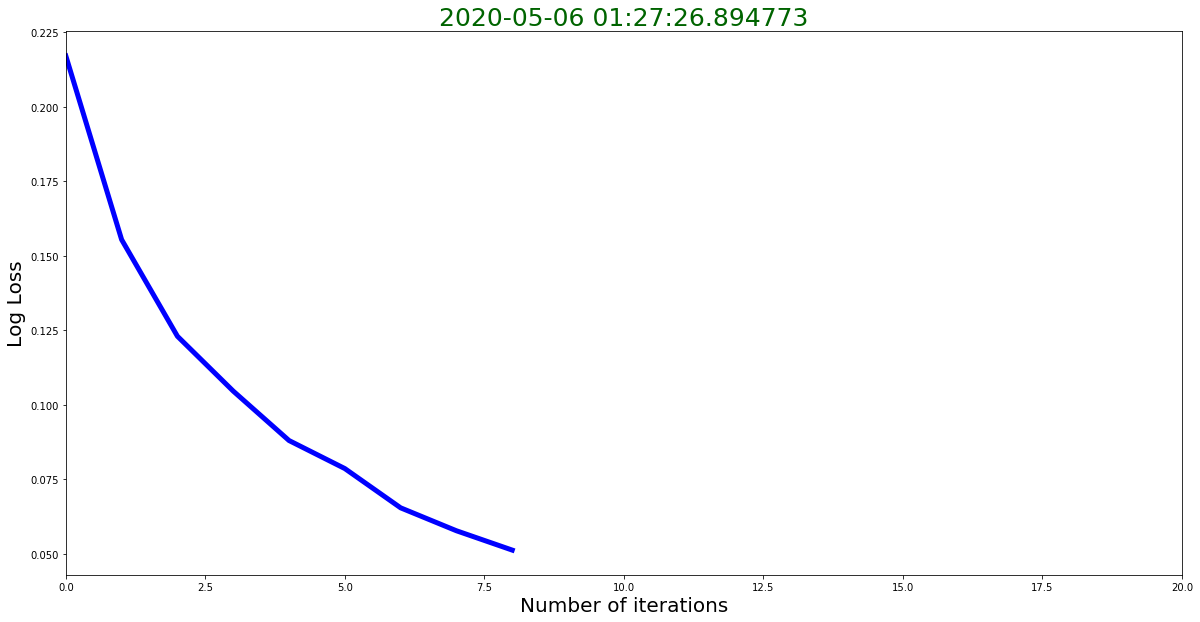

{'textcat': 0.05115064727465324}


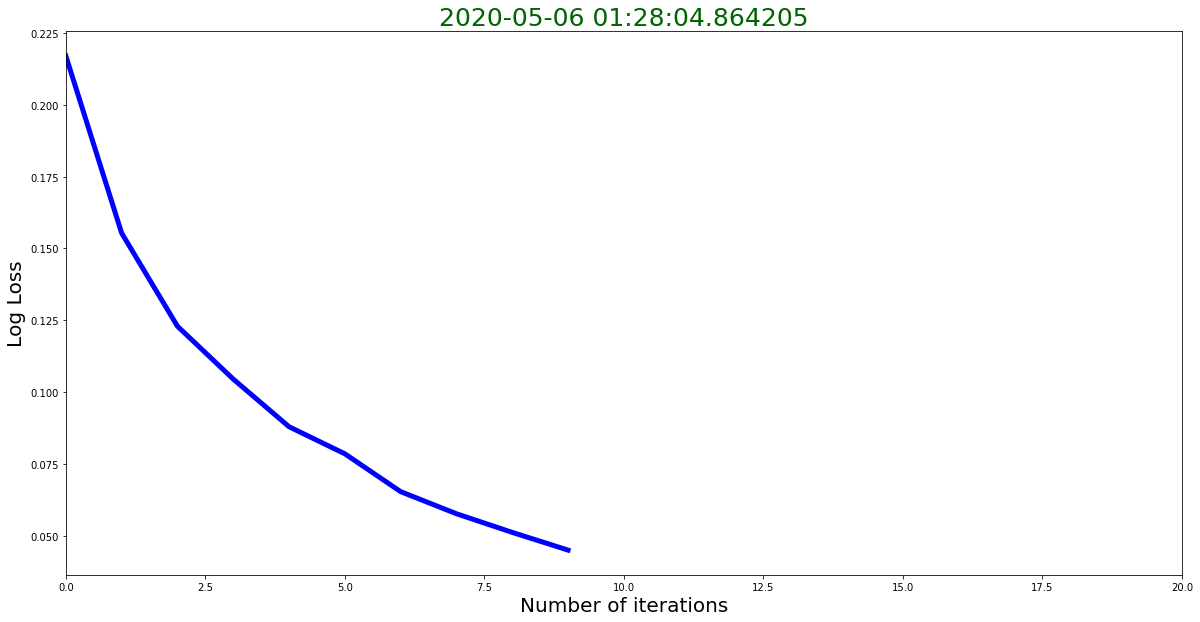

{'textcat': 0.04498632166473726}


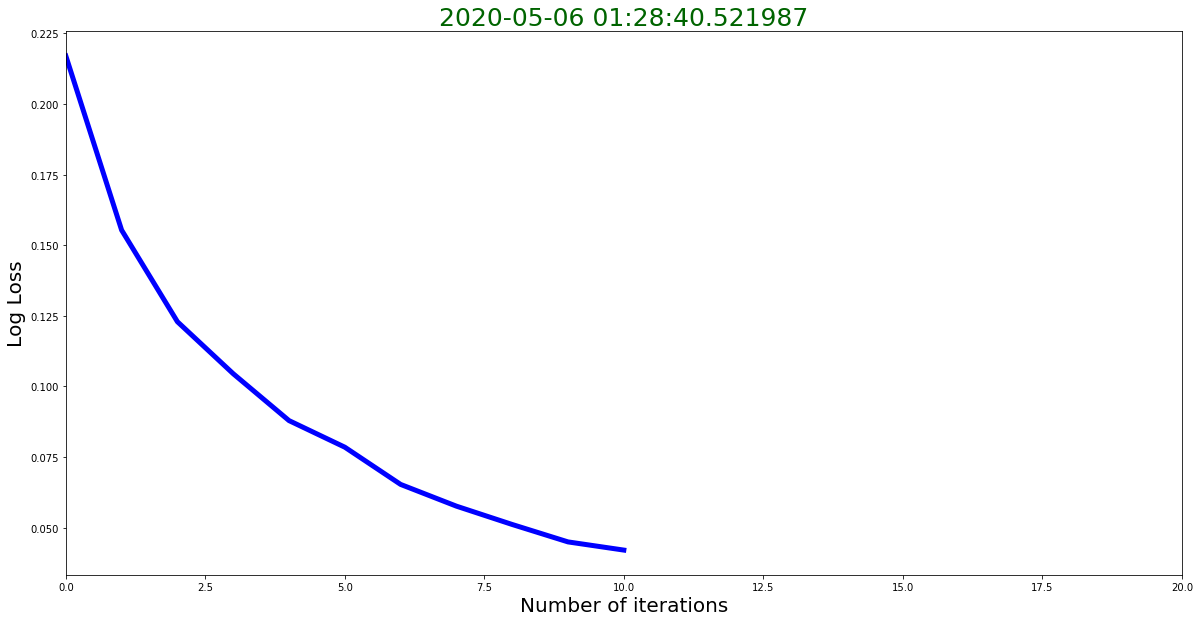

{'textcat': 0.04209141960211582}


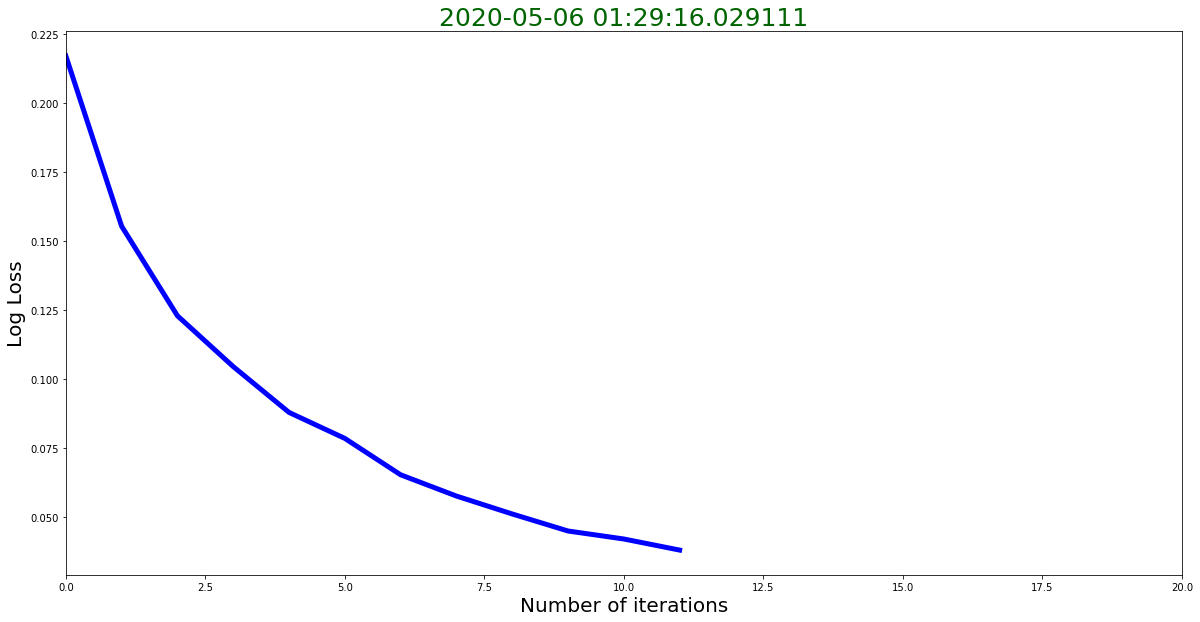

{'textcat': 0.038074398510900664}


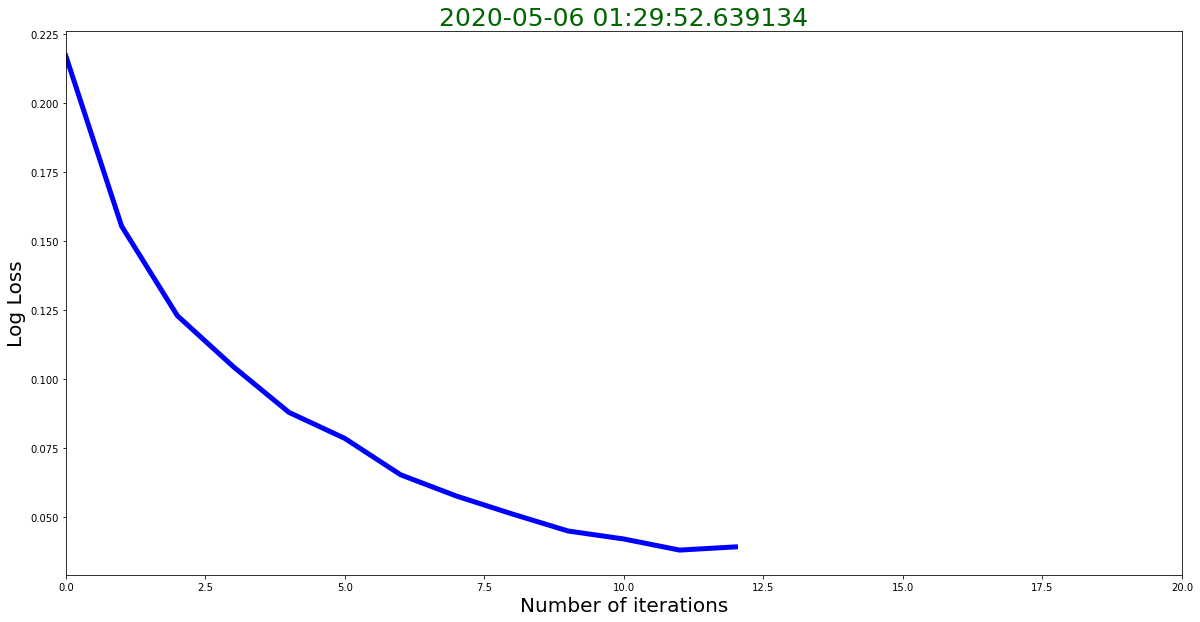

{'textcat': 0.03923498265669423}


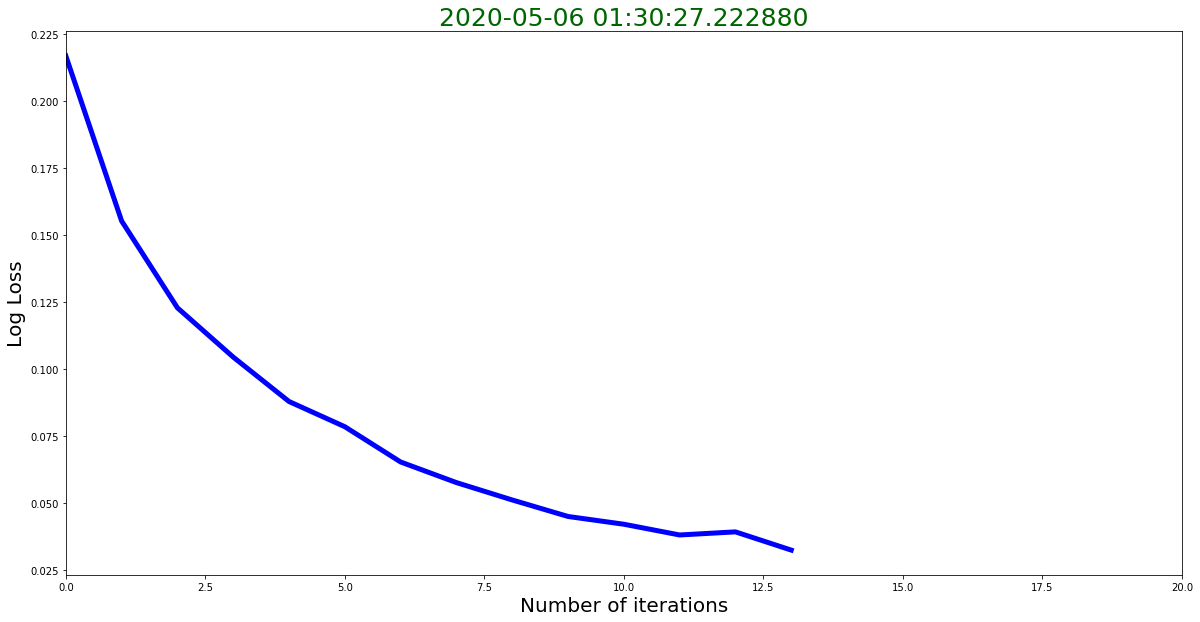

{'textcat': 0.032431480435320736}


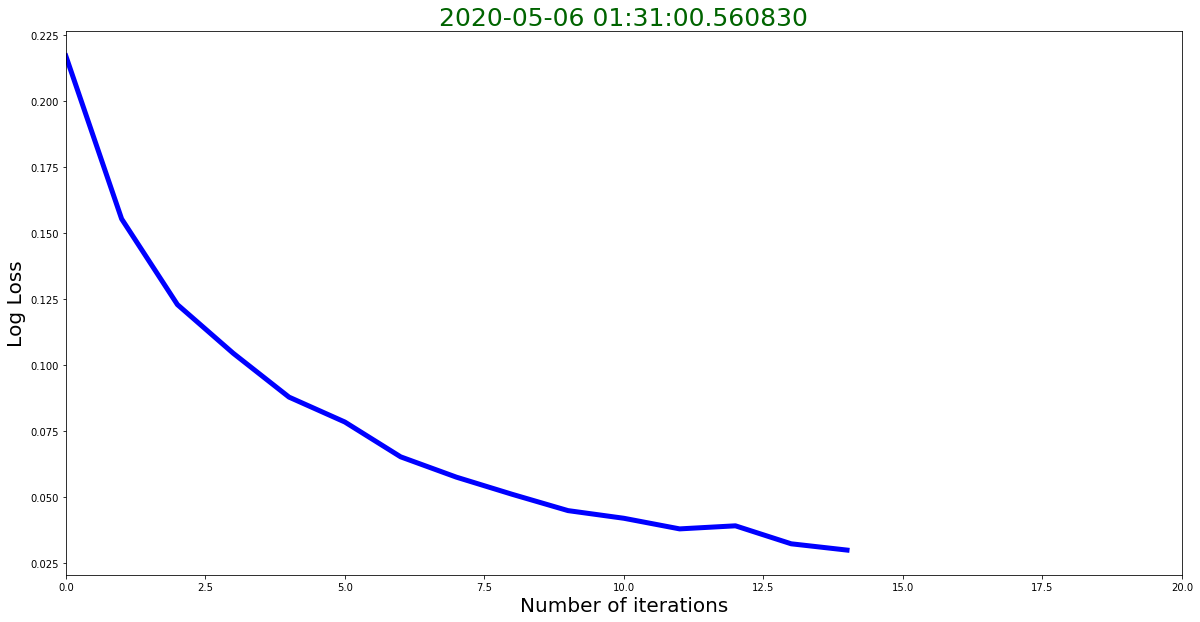

{'textcat': 0.030053720824412267}


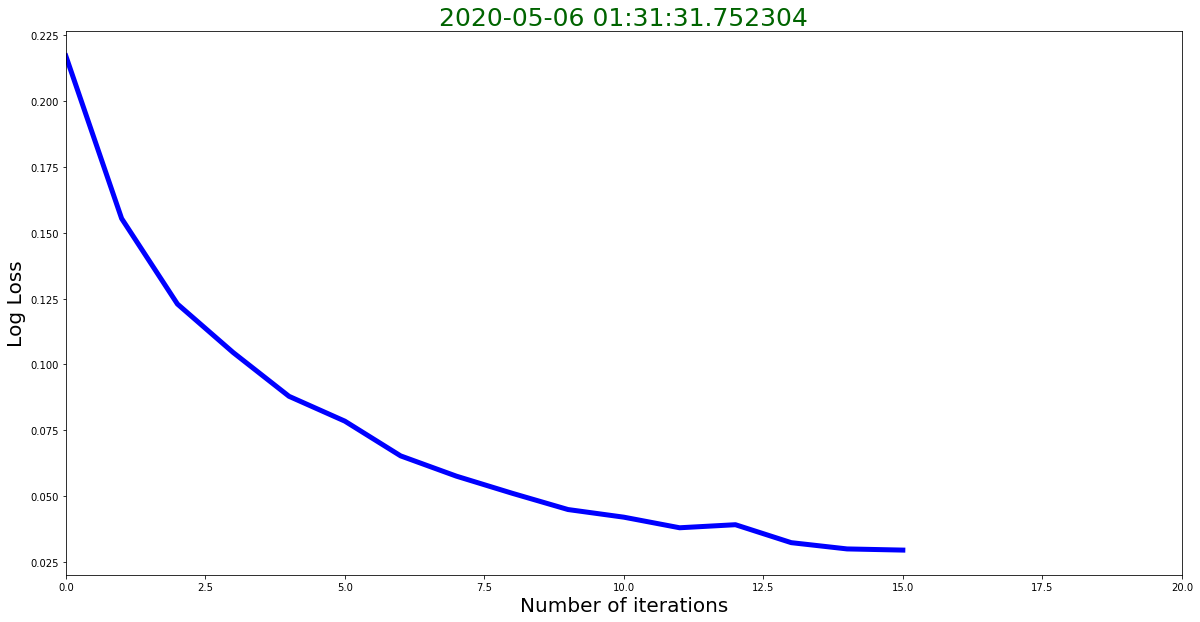

{'textcat': 0.02961065553483877}


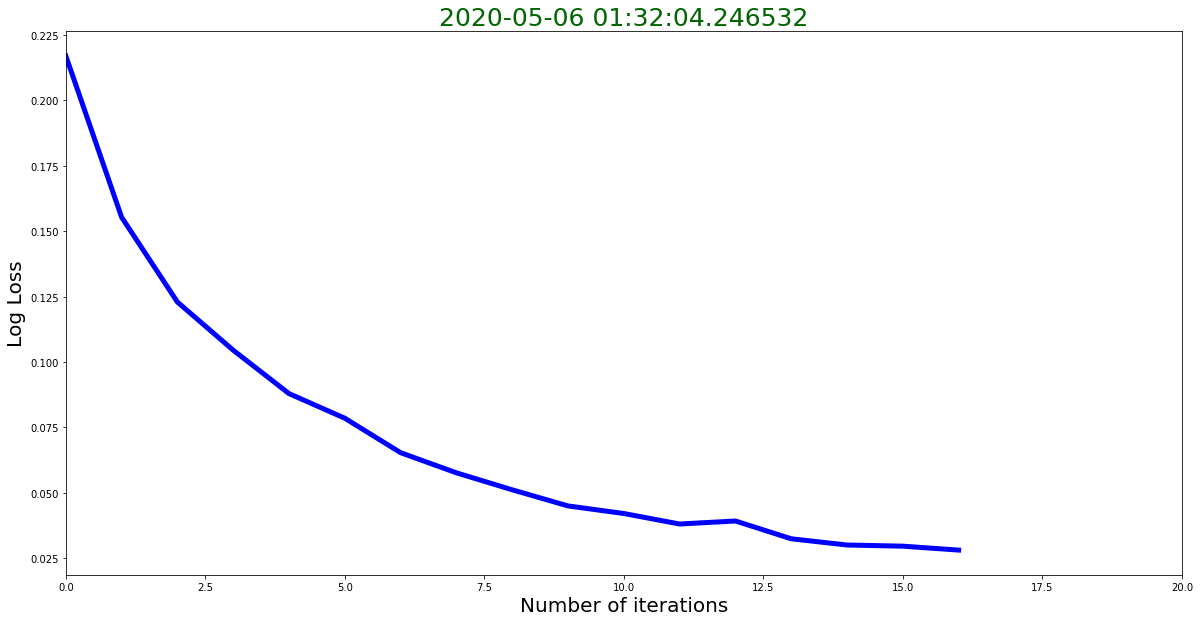

{'textcat': 0.028110702503624907}


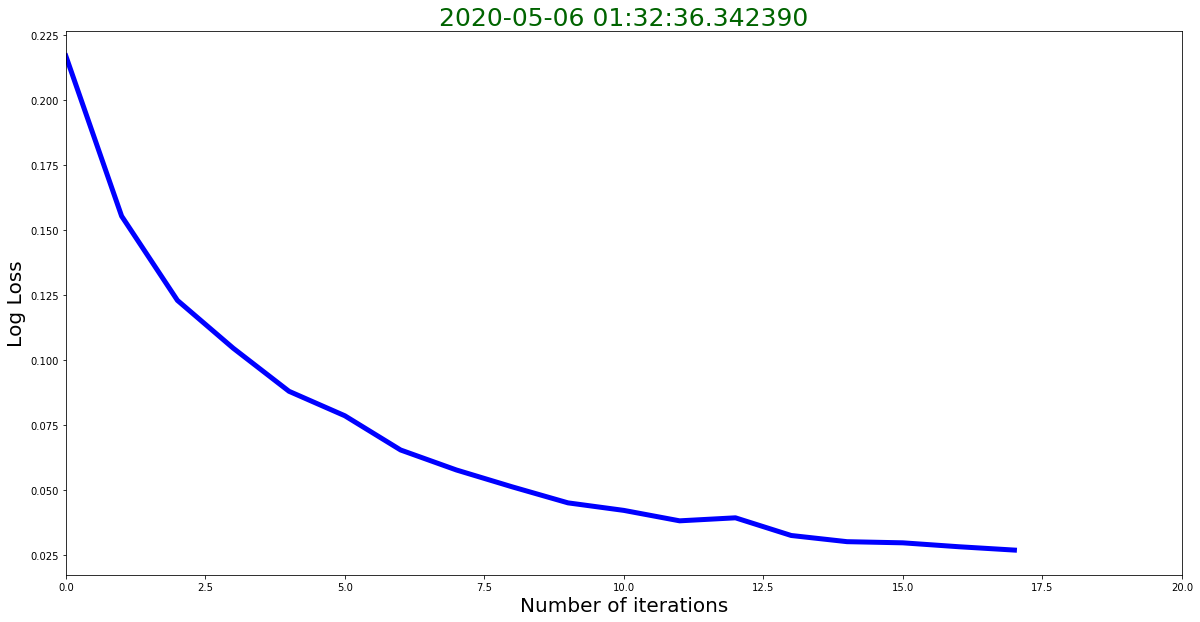

{'textcat': 0.026814369785824965}


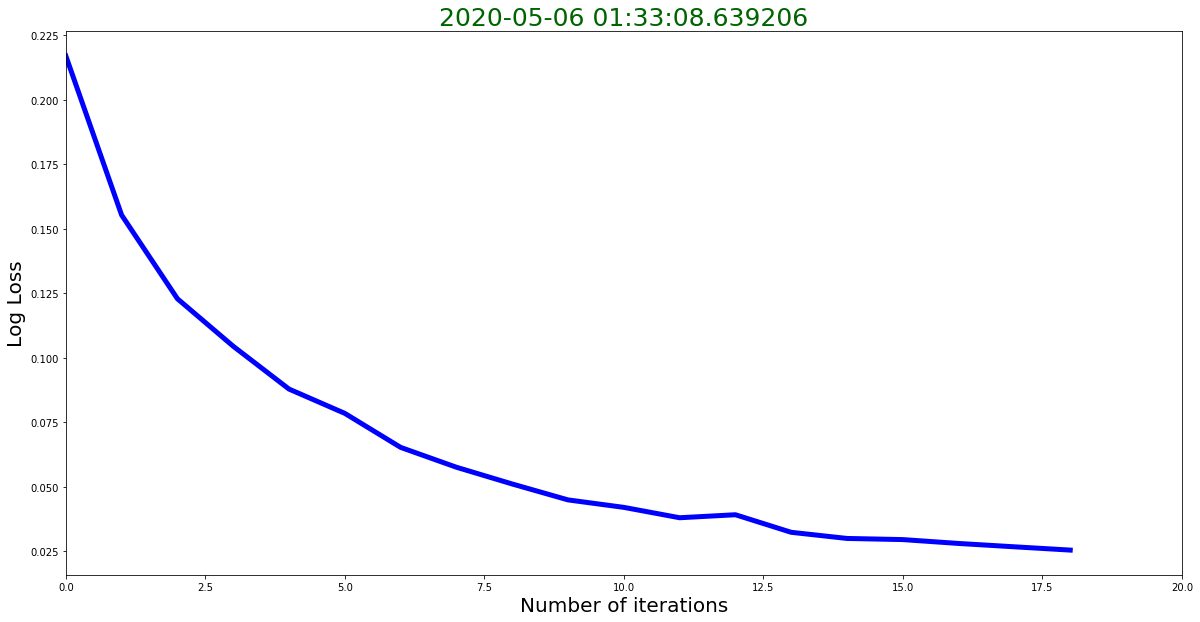

{'textcat': 0.025542988612073714}


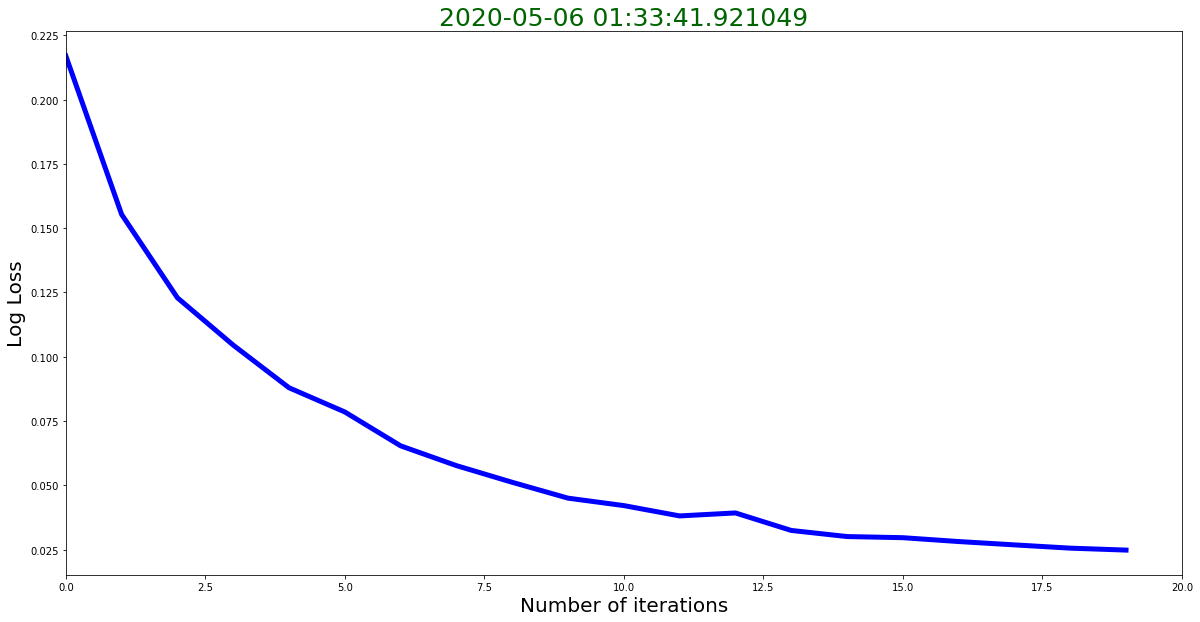

{'textcat': 0.024786858969264358}


In [25]:
with nlp.disable_pipes(other_pipes):
    optimizer = nlp.begin_training()
    loss_data = []
    for i in range(20):
        random.shuffle(train_data)
        losses = {}
        for batch in spacy.util.minibatch(train_data, size=20):
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd = optimizer, drop = 0.2, losses=losses)
        loss_data.append(losses['textcat'])
        fig = plt.figure(figsize = (20, 10))
        ax = fig.add_subplot(111)
        ax.set_title(datetime.today(), fontsize = 25, color = 'darkgreen')
        ax.plot(np.arange(i + 1), loss_data, linewidth = 5, color = 'blue')
        ax.set_xlim([0, 20])
        ax.set_xlabel("Number of iterations", fontsize = 20)
        ax.set_ylabel("Log Loss", fontsize = 20)
        plt.show()
        print(losses)

In [29]:
text = "Accident in #Ashville on US 23 SB before SR 752 #traffic http://t.co/hylMo0WgFI"
df_test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago URL
3261,MEG issues Hazardous Weather Outlook (HWO) URL


In [30]:
df_test

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan
...,...
3258,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,Storm in RI worse than last hurricane. My city...
3260,Green Line derailment in Chicago URL
3261,MEG issues Hazardous Weather Outlook (HWO) URL


In [32]:
df_test = pd.read_csv("test.csv")
df_test = df_test.drop(['keyword', 'location'], axis=1)
df_test['target'] = df_test['text'].apply(lambda text: 1 if nlp(text).cats['POSITIVE'] > 0.5 else 0)
df_test = df_test.drop(['text'], axis=1)
df_test.to_csv("result.csv")
df_test

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
